## Analysis
---

#### Import Scripts

In [1]:
%run -i '../scripts/tw_net_cleaning.py'

In [2]:
%run -i '../scripts/tw_net_analysis.py'

In [24]:
%run -i '../scripts/tw_net_extraction.py'

#### Load & Clean Tweets

In [27]:
'''
Enter days/sets/calls combination to select 
one or more sets of tweets to be returned as dataframe.

'''
days = [18,19,20,21,21]
sets = [1,2,3,4,5,6]
calls = [1,2,3,4,5]
tweets_per_call = 25

df = TweetsToDataframe(days,sets,calls,tweets_per_call,useWeights=True)

df.head()

../scripts/tw_net_extraction.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
../scripts/tw_net_extraction.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # 'ch_trigram','ch_quadgram', 'ch_trigram_user_description','ch_quadgram_user_description'
../scripts/tw_net_extraction.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

,id_str,text,created_hr,created_dotw,calltime,day,set,call,favorite_count,retweet_count,...,profile_background_color,profile_text_color,user_screen_name,statuses_count,verified,num_tags,num_media,num_symbols,num_urls,num_user_mentions
0,1097473283946172417,@NetflixFR A Moi,7,Mon,2019-02-18 07:52:11.164523,18,1,1,0,0,...,000000,000000,nicolas_dulac,58,False,0,0,0,0,1
1,1097473425747132416,@Dylan_Derpy @TheRogueEnergy This is what I th...,7,Mon,2019-02-18 07:52:11.164523,18,1,1,0,0,...,000000,000000,GHILLIEMCGEE282,504,False,0,0,0,0,2
2,1097473465668550656,@realDonaldTrump Nice distraction from manafor...,7,Mon,2019-02-18 07:52:11.164523,18,1,1,0,0,...,C6E2EE,663B12,TodfromPa,45833,False,0,0,0,1,1
3,1097473503736066048,But his supporters said It’s only the Daily Ma...,7,Mon,2019-02-18 07:52:11.164523,18,1,1,0,0,...,C0DEED,333333,erlyonurse,1038,False,0,0,0,1,0
4,1097473510811803648,4 more on this video,7,Mon,2019-02-18 07:52:11.164523,18,1,1,0,0,...,BADFCD,0C3E53,KurlyKole,38712,False,0,0,0,0,0


In [13]:
df.describe()

,favorite_count,retweet_count,influence_score,user_since,favorites_counts,followers_count,friends_count,listed_count,statuses_count,num_tags,num_media,num_symbols,num_urls,num_user_mentions
count,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.0,5250.000000,5250.000000
mean,1.024571,0.152381,56.690210,5.631238,21684.094857,2146.791810,1538.297333,34.954857,30441.955429,0.204952,0.091619,0.0,0.438286,1.049333
std,4.027005,0.814015,171.095321,3.066982,42772.182135,6564.861754,3437.908762,132.143658,55048.976139,0.825101,0.288515,0.0,0.513210,1.487755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,4.681250,3.000000,1504.000000,164.000000,265.000000,1.000000,2500.250000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,13.800000,6.000000,6297.500000,484.500000,625.000000,5.000000,10106.500000,0.000000,0.000000,0.0,0.000000,1.000000
75%,1.000000,0.000000,40.575000,8.000000,19893.500000,1479.750000,1569.000000,22.000000,28034.000000,0.000000,0.000000,0.0,1.000000,1.000000
max,92.000000,18.000000,2434.725000,12.000000,381368.000000,95127.000000,51376.000000,2332.000000,371459.000000,9.000000,1.000000,0.0,2.000000,10.000000


In [ ]:
'''
Distribution of influence scores
'''
ax = sns.distplot(df['influence_score'],kde=False)

In [ ]:
outliers = df['influence_score'].mean()+ df['influence_score'].std()*3.5

df = df[df['influence_score'] < outliers]

In [ ]:
ax = sns.distplot(df['influence_score'],kde=False)

#### Preview Feature Set

In [28]:
'''
Wrap all but text. Leave identifiers and text to check.
''' 
preview_df = PreviewFeatureSet(df,isRandom=False)
preview_df.head()

../scripts/tw_net_extraction.py:21: DeprecationWarning: generator 'ngrams' raised StopIteration
  return list(ngrams(text_list, grams))


,tweet_id,text,created_hr,set,favorite_count,retweet_count,influence_score,user_description,user_since,favorites_counts,...,bigrams,trigrams,quadgrams,bigrams_user_description,trigrams_user_description,quadgrams_user_description,isVerified,isRetweeted,isReply,dotw
733,1097643355826204673,@alex_valadez10 @L_tothe_C @Strideline @TeamJu...,18,6,2,2,908.350,The official Twitter of SteelerNation. Visit o...,2,13753,...,"[(strideline, teamjuju), (teamjuju, go)]","[(strideline, teamjuju, go)]",[],"[(official, twitter), (twitter, steelernation)...","[(official, twitter, steelernation), (twitter,...","[(official, twitter, steelernation, visit), (t...",1,1,1,2
683,1097643355826204673,@alex_valadez10 @L_tothe_C @Strideline @TeamJu...,18,6,2,2,908.250,The official Twitter of SteelerNation. Visit o...,2,13750,...,"[(strideline, teamjuju), (teamjuju, go)]","[(strideline, teamjuju, go)]",[],"[(official, twitter), (twitter, steelernation)...","[(official, twitter, steelernation), (twitter,...","[(official, twitter, steelernation, visit), (t...",1,1,1,2
708,1097643355826204673,@alex_valadez10 @L_tothe_C @Strideline @TeamJu...,18,6,2,2,908.250,The official Twitter of SteelerNation. Visit o...,2,13753,...,"[(strideline, teamjuju), (teamjuju, go)]","[(strideline, teamjuju, go)]",[],"[(official, twitter), (twitter, steelernation)...","[(official, twitter, steelernation), (twitter,...","[(official, twitter, steelernation, visit), (t...",1,1,1,2
658,1097643355826204673,@alex_valadez10 @L_tothe_C @Strideline @TeamJu...,18,6,2,2,908.025,The official Twitter of SteelerNation. Visit o...,2,13743,...,"[(strideline, teamjuju), (teamjuju, go)]","[(strideline, teamjuju, go)]",[],"[(official, twitter), (twitter, steelernation)...","[(official, twitter, steelernation), (twitter,...","[(official, twitter, steelernation, visit), (t...",1,1,1,2
633,1097643355826204673,@alex_valadez10 @L_tothe_C @Strideline @TeamJu...,18,6,0,0,906.200,The official Twitter of SteelerNation. Visit o...,2,13733,...,"[(strideline, teamjuju), (teamjuju, go)]","[(strideline, teamjuju, go)]",[],"[(official, twitter), (twitter, steelernation)...","[(official, twitter, steelernation), (twitter,...","[(official, twitter, steelernation, visit), (t...",1,0,1,2


In [ ]:
ax = sns.lineplot(preview_df[''])

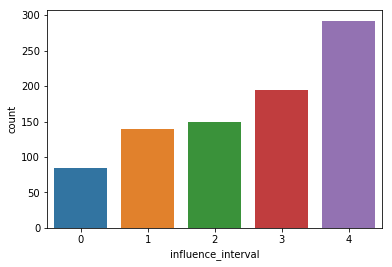

In [14]:
ax = sns.countplot(x="influence_interval", data=preview_df)

#### Extract and Save Feature Set

In [29]:
'''
Wrap text, remove identifiers/text, output ready for ml.
This takes forever.
''' 
featureSet = GetFeatureSet(preview_df)
featureSet.head()

,created_hr,set,favorite_count,retweet_count,influence_score,user_since,followers_count,listed_count,num_tags,num_media,...,"('nothing', 'would', 'probably')","('would', 'probably', 'drop')","('probably', 'drop', 'dead')","('drop', 'dead', 'right')","('dead', 'right', 'spot')","('kiddchris', 'nothing', 'would', 'probably')","('nothing', 'would', 'probably', 'drop')","('would', 'probably', 'drop', 'dead')","('probably', 'drop', 'dead', 'right')","('drop', 'dead', 'right', 'spot')"
733,18,6,2,2,908.350,2,35839,141,0,0,...,0,0,0,0,0,0,0,0,0,0
683,18,6,2,2,908.250,2,35835,141,0,0,...,0,0,0,0,0,0,0,0,0,0
708,18,6,2,2,908.250,2,35835,141,0,0,...,0,0,0,0,0,0,0,0,0,0
658,18,6,2,2,908.025,2,35826,141,0,0,...,0,0,0,0,0,0,0,0,0,0
633,18,6,0,0,906.200,2,35825,141,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
featureSet.columns

In [30]:
file_io.WriteCSV(featureSet,'wk2_25_ww_nr_wt')

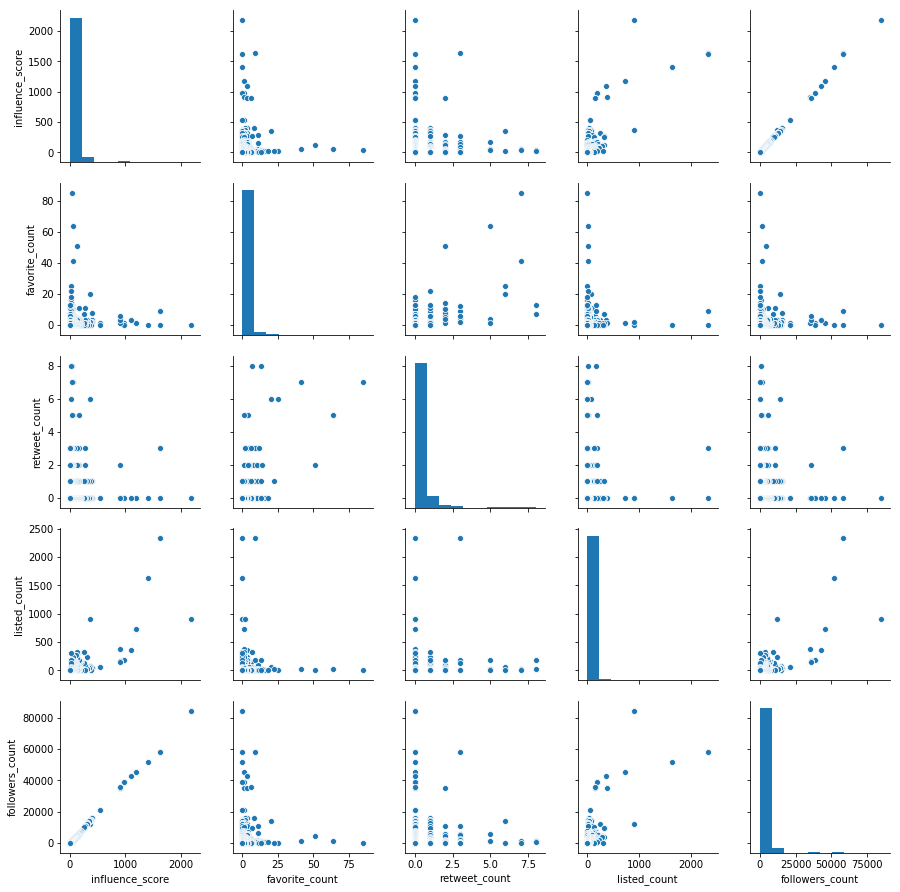

In [15]:
g = sns.pairplot(featureSet,vars=["influence_score",'favorite_count','retweet_count','listed_count','followers_count'])